# Zadanie 1.1

In [2]:
import cv2

I = cv2.imread('resources/mandril.jpg')
cv2.imshow("Mandril",I) # display
cv2.waitKey(0) # wait for key
cv2.destroyAllWindows() # close all windows

In [3]:
cv2.imwrite("m.png",I)

True

In [4]:
print(I.shape) # dimensions /rows, columns, depth/
print(I.size) # number of bytes
print(I.dtype) # data type

(512, 512, 3)
786432
uint8


# Zadanie 1.2

In [5]:
import matplotlib.pyplot as plt

In [6]:
I = plt.imread('resources/mandril.jpg')

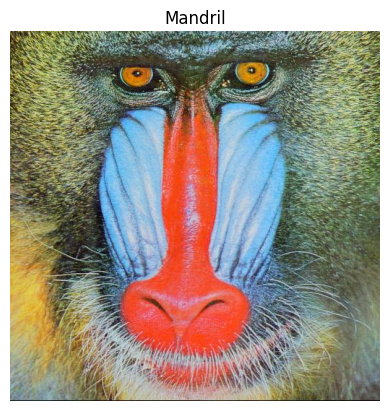

In [7]:
plt.figure(1) # create figure
plt.imshow(I) # add image
plt.title('Mandril') # add title
plt.axis('off') # disable display of the coordinate system
plt.show() # display


In [8]:
plt.imsave('mandril.png',I)

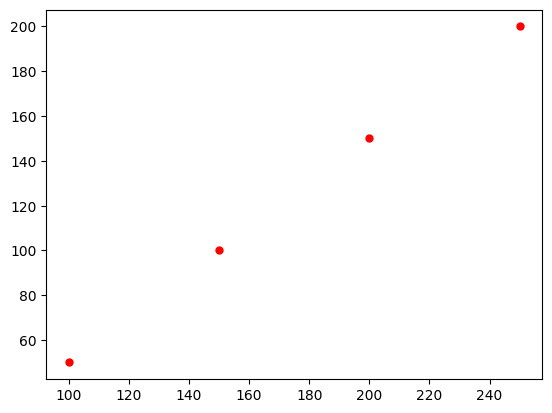

In [9]:
x = [ 100, 150, 200, 250]
y = [ 50, 100, 150, 200]
plt.plot(x,y,'r.',markersize=10)

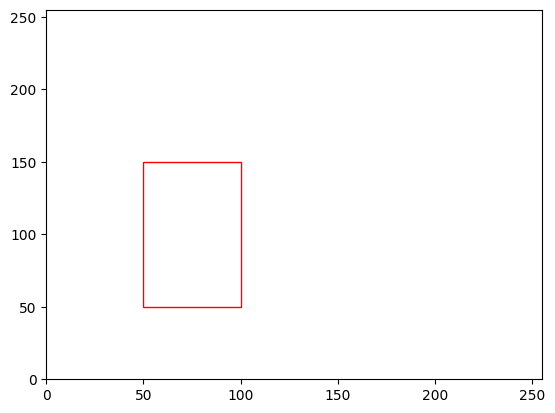

In [10]:
from matplotlib.patches import Rectangle # add at the top of the file
fig,ax = plt.subplots(1) # instead of plt.figure(1)
rect = Rectangle((50,50),50,100,fill=False, ec='r'); # ec - edge colour
ax.add_patch(rect)
ax.set_xlim(0, 255)
ax.set_ylim(0,255)
plt.show()

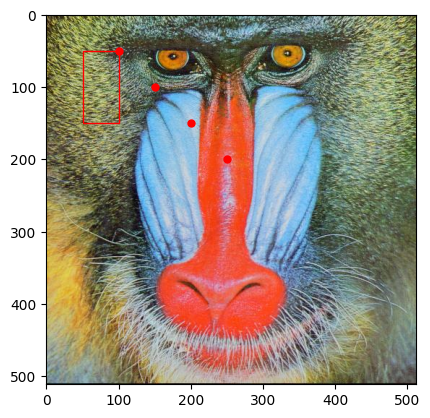

In [11]:
fig,ax = plt.subplots() # instead of plt.figure(1)
rect = Rectangle((50,50),50,100,fill=False, ec='r'); # ec - edge colour
ax.imshow(I)
ax.add_patch(rect)
ax.plot(x,y,'r.',markersize=10)
plt.show()

# Zadanie 1.3

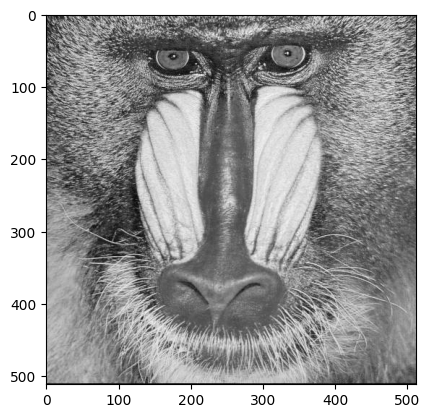

In [12]:
IG = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
IHSV = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)

plt.imshow(IG,cmap='gray')

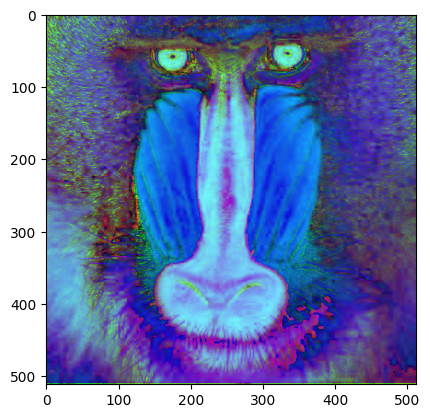

In [13]:
plt.imshow(IHSV)

In [14]:
IH = IHSV[:, :, 0]
IS = IHSV[:, :, 1]
IV = IHSV[:, :, 2]

Składowa H

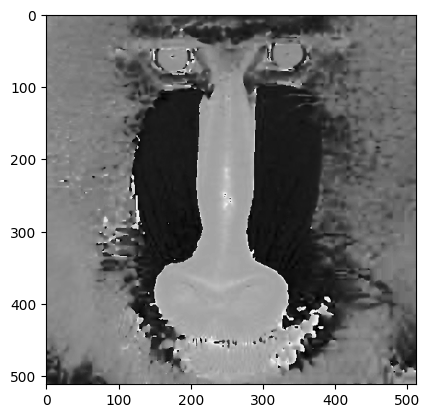

In [15]:
plt.imshow(IH,cmap='gray')

Składowa S

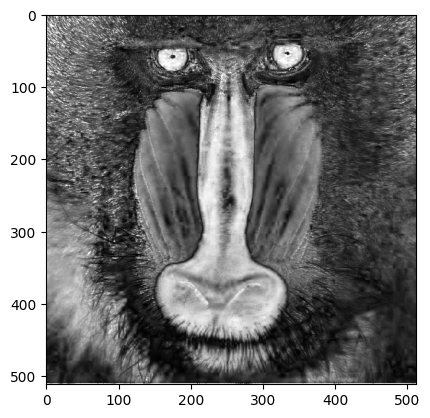

In [16]:
plt.imshow(IS,cmap='gray')

Składowa V

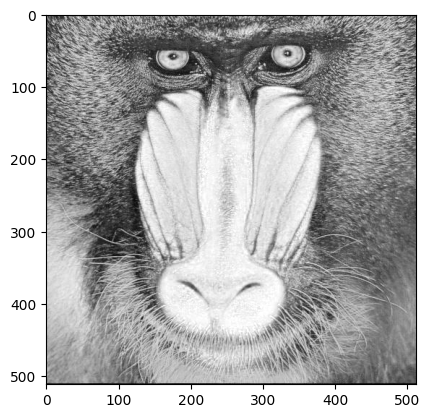

In [17]:
plt.imshow(IV,cmap='gray')

Konwersja rgb do szarego w matplotlib

In [18]:
def rgb2gray(I):
    return 0.299*I[:,:,0] + 0.587*I[:,:,1] + 0.114*I[:,:,2] 

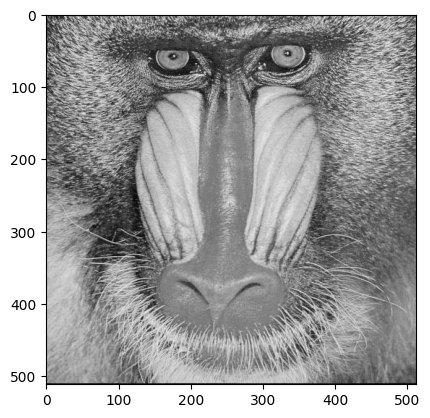

In [19]:
plt.imshow(rgb2gray(I),cmap='gray')

Konwersja rgb do hsv w matplotlib

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


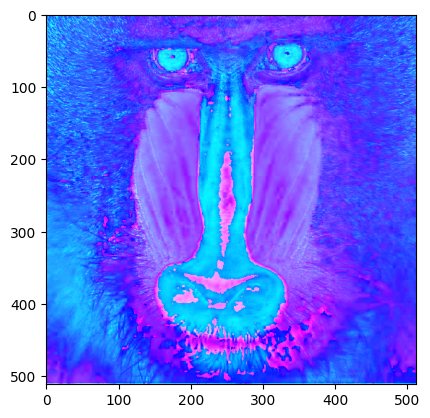

In [20]:
import matplotlib # add at the top of the file
_HSV = matplotlib.colors.rgb_to_hsv(I)
plt.imshow(_HSV)

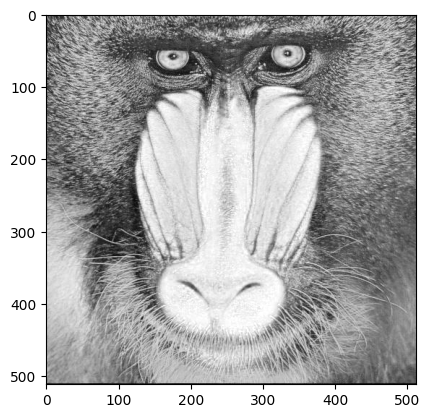

In [21]:
plt.imshow(_HSV[:,:,0],cmap='gray')
plt.imshow(_HSV[:,:,1],cmap='gray')
plt.imshow(_HSV[:,:,2],cmap='gray')

# Zadanie 1.4

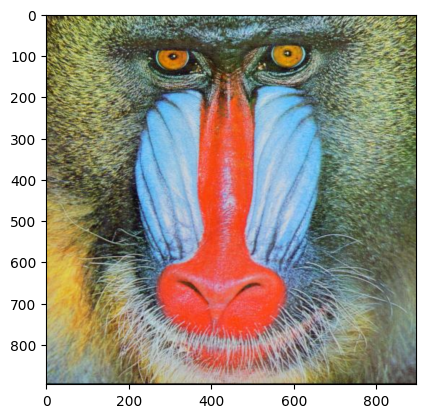

In [22]:
height, width =I.shape[:2] # retrieving elements 1 and 2, i.e. the corresponding height and width
scale = 1.75 # scale factor
Ix2 = cv2.resize(I,(int(scale*height),int(scale*width)))
plt.imshow(Ix2)

# Zadanie 1.5

In [23]:
import numpy as np

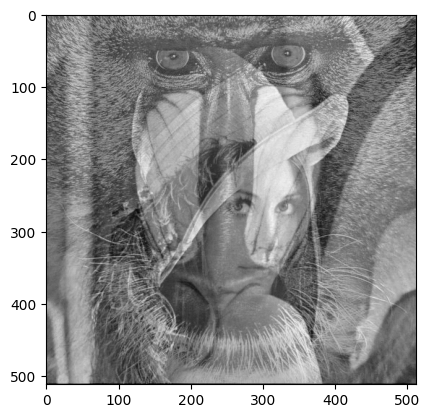

In [24]:
lena = cv2.imread('resources/lena.png')
lenaG = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
result = lenaG.astype(np.int16) + IG 
result = result/np.max(result)
result = result*255
result = result.astype(np.uint8)
plt.imshow(result,cmap='gray')

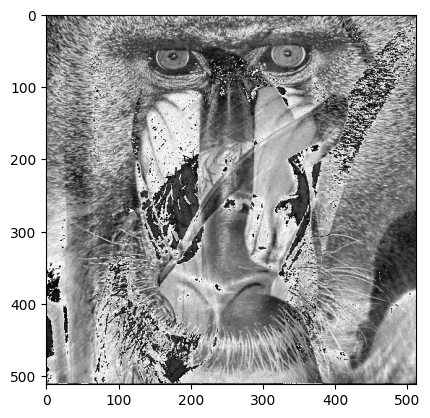

In [25]:
result = lenaG.astype(np.int8) - IG
result = result + np.min(result)
result = result/np.max(result)
result = result*255
result = result.astype(np.uint8)
plt.imshow(result,cmap='gray')

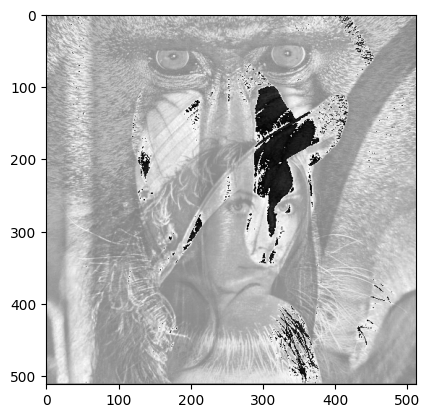

In [26]:
result = lenaG.astype(np.int16) * IG
result = result / np.max(result)
result = result * 255
plt.imshow(result,cmap='gray')

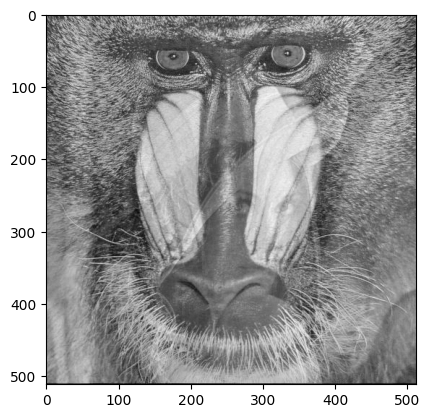

In [27]:
result = 0.25 * lenaG + 0.75 * IG
result = result.astype(np.uint8)
plt.imshow(result,cmap='gray')

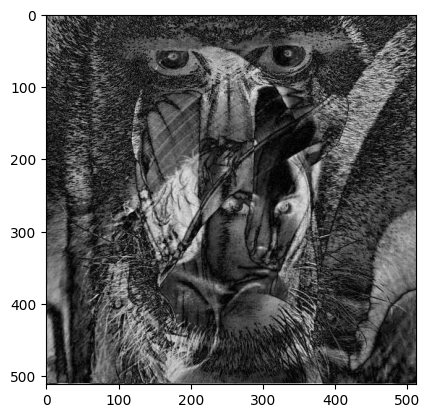

In [28]:
result = cv2.absdiff(lenaG, IG)
plt.imshow(result,cmap='gray')

# Zadanie 1.6

In [29]:
def hist(img):
    h=np.zeros((256,1), np.float32) # creates and zeros single-column arrays
    height, width =img.shape[:2] # shape - we take the first 2 values
    for y in range(height):
        for x in range(width):
            h[img[y,x]] += 1
    return h

In [30]:
hist_method = hist(IG)
hist_cv2 = cv2.calcHist([IG],[0],None,[256],[0,256])

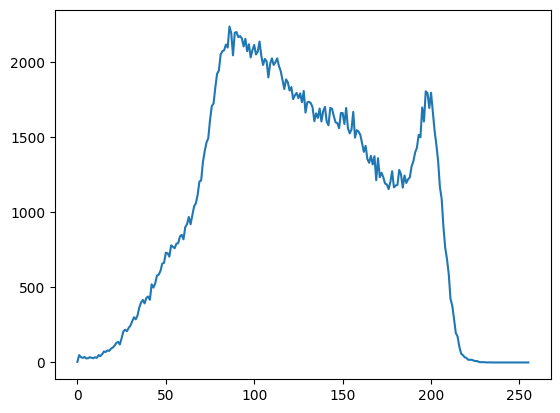

In [31]:
plt.plot(hist_method)

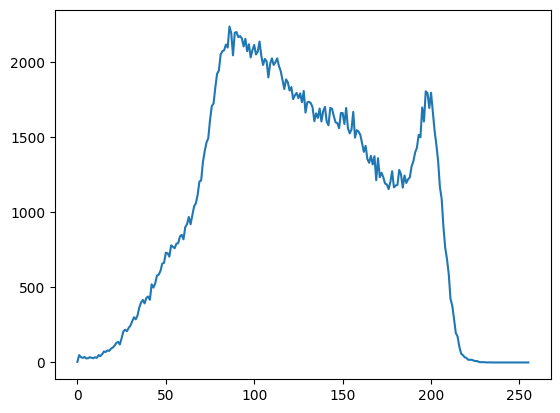

In [32]:
plt.plot(hist_cv2)

## Klasyczne wyrównanie

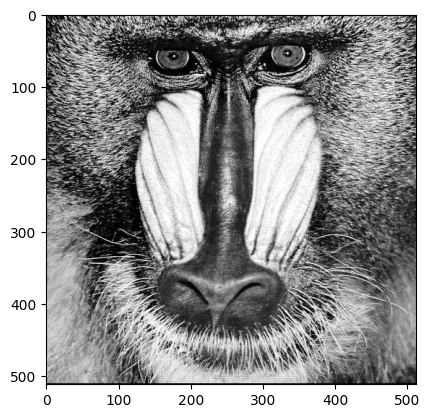

In [33]:
IGE = cv2.equalizeHist(IG)
plt.imshow(IGE,cmap='gray')

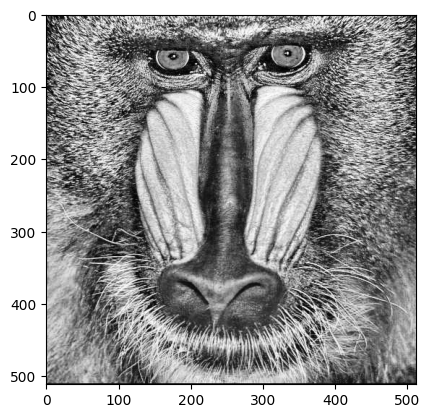

In [34]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# clipLimit - maximum height of the histogram bar - values above are distributed among neighbours
# tileGridSize - size of a single image block (local method, operates on separate image blocks)
I_CLAHE = clahe.apply(IG)

plt.imshow(I_CLAHE,cmap='gray')

## Zadanie 1.7

Gaussian Blur

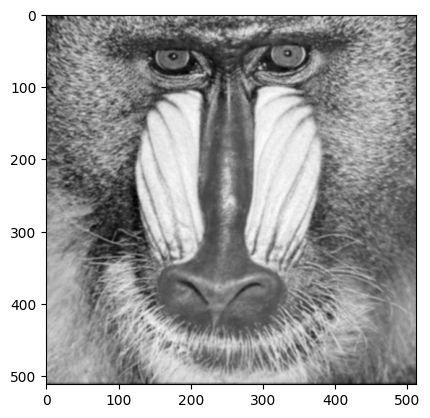

In [35]:
gaussian_blur = cv2.GaussianBlur(IG,(5,5),0)
plt.imshow(gaussian_blur,cmap='gray')

Sobel

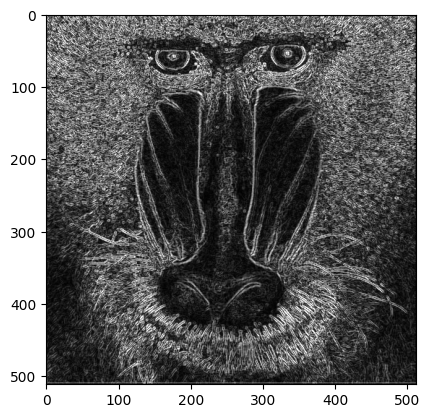

In [36]:
grad_x = cv2.Sobel(IG, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(IG, cv2.CV_64F, 0, 1, ksize=3)
    
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
    
    
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    
plt.imshow(grad,cmap='gray')

Laplasjan

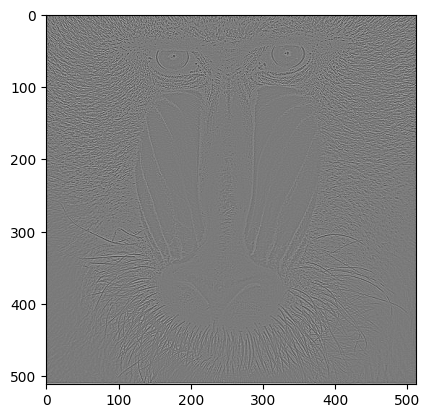

In [37]:
laplacian = cv2.Laplacian(IG, cv2.CV_64F)
plt.imshow(laplacian, cmap='gray')

Median

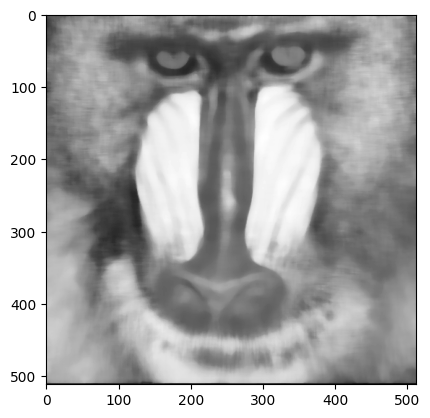

In [38]:
median = cv2.medianBlur(IG,15)
plt.imshow(median, cmap='gray')